# Iris dataset 
## optimising thetha values using normal method

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
data=data.drop("Id",axis=1)  #removing id 

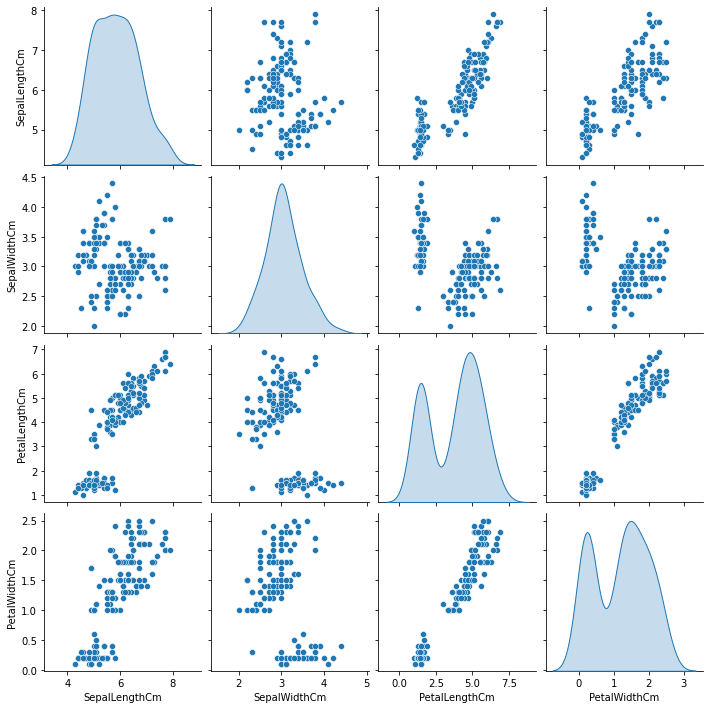

In [6]:
sns.pairplot(data,diag_kind="kde")

In [7]:
data=data.drop("Species",axis=1)

In [8]:
l=data.drop("PetalLengthCm",axis=1)
x=l.to_numpy()
k=data[["PetalLengthCm"]]
y=k.to_numpy()

In [9]:
x_b=np.c_[np.ones((150,1)),x]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [11]:
X_train ,X_test ,Y_train,Y_test=train_test_split(x_b,y,test_size=0.2,random_state=1)

In [12]:
theta_opt=np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(Y_train)

In [13]:
theta_opt

array([[-0.37885896],
       [ 0.74678083],
       [-0.63428439],
       [ 1.4299078 ]])

In [14]:
y_pred=X_test.dot(theta_opt)

In [15]:
r2_score(Y_test,y_pred)

0.9486751289528841

In [16]:
result=np.c_[Y_test,y_pred]

In [17]:
df=pd.DataFrame(result,columns=["actual","prediction"])

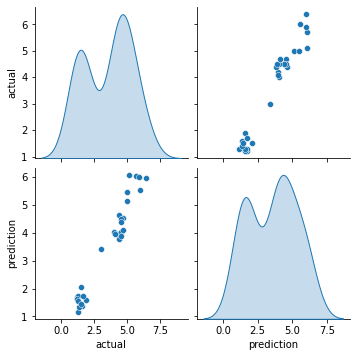

In [18]:
sns.pairplot(df,diag_kind='kde')

In [31]:
len(Y_test)

30

In [36]:
g=np.arange(30)
g

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

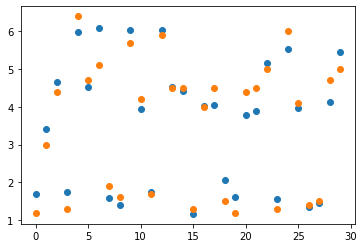

In [39]:
plt.scatter(g,y_pred)
plt.scatter(g,Y_test)